## Material de la pràctica 1

1. Bases de dades a Kaggle: cada grup utilitzarà les bases de dades que se li hagin assignat. 
2. Codi d'exemple (aquest document).
3. Apunts de l'assignatura.
4. Llibreries de python: scikit-learn, numpy, scipy, matplotlib.

### Bases de Dades

| #  | URL                                                                      | GRUP        |
| GPA606-1530 |
| 32 | https://www.kaggle.com/olgabelitskaya/russian-financial-indicators


Definició del fitxer amb la base de dades i atributs escollits.

In [8]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('c_bank.csv')
data = dataset.values

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (1128, 14)
Dimensionalitat de les entrades X (1128,)
Dimensionalitat de l'atribut Y (1128,)


Comprovació de la validesa de les dades.

In [6]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
date                         0
monetary_gold                0
foreign_exchange_reserves    0
gold                         0
silver                       0
platinum                     0
palladium                    0
dual_currency_basket         0
EUR_978                      0
USD_840                      0
JPY_392                      0
CNY_156                      0
INR_356                      0
BRL_986                      0
dtype: int64


Mirem les estadístiques principals en en una taula. Aixó ens servirà per veure les dades d'una manera més 
numérica i no tan gràfica.

In [7]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


,monetary_gold,foreign_exchange_reserves,gold,silver,platinum,palladium,dual_currency_basket,EUR_978,USD_840,JPY_392,CNY_156,INR_356,BRL_986
count,1128.000,1128.000,1128.000,1128.000,1128.000,1128.000,1128.000,1128.000,1128.000,1128.000,1128.000,1128.000,1128.000
mean,48119.759,409804.359,1861.915,28.486,1763.605,969.002,48.464,53.630,44.237,0.425,7.027,0.722,16.712
std,4965.205,68526.230,478.427,5.195,292.316,295.731,15.018,14.475,15.530,0.104,2.347,0.203,2.157
min,38547.000,307718.000,1255.160,19.570,1392.060,575.070,33.303,38.412,28.947,0.304,4.585,0.488,13.543
25%,45016.000,327147.000,1492.945,23.160,1547.053,707.352,35.726,40.631,31.805,0.340,5.089,0.567,15.332
50%,47680.000,442776.000,1666.535,28.715,1643.355,904.585,40.592,47.541,35.018,0.391,5.690,0.591,16.036
75%,50441.000,473393.000,2263.278,32.265,1975.060,1235.650,65.045,69.023,61.512,0.510,9.658,0.950,17.924
max,63497.000,486578.000,3167.940,43.380,2746.690,1745.690,87.007,91.181,83.591,0.714,12.705,1.230,26.676


Hem decidit treure les monedes que no son ni el dolar ni el euro, explicat a l'informe.

In [10]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',', usecols=range(10))
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('c_bank.csv')
data = dataset.values

x = data[:, 0]
y = data[:, 9]

Inserim dues gràfiques. Un histograma de barres i una evolució de la moneda USD, comparada amb el ruble respecte el temps.

<IPython.core.display.Javascript object>


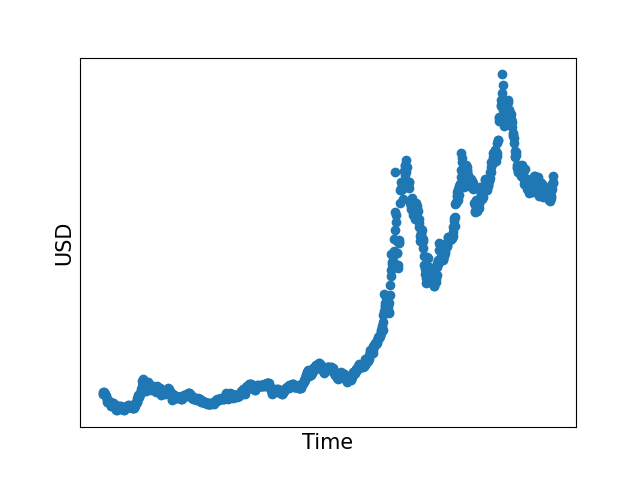

In [12]:
plt.figure()
plt.xlabel('Time', fontsize=15) 
plt.ylabel('USD', fontsize=15) 
plt.xticks([])   
  
plt.yticks([])
ax = plt.scatter(x, y)

<IPython.core.display.Javascript object>


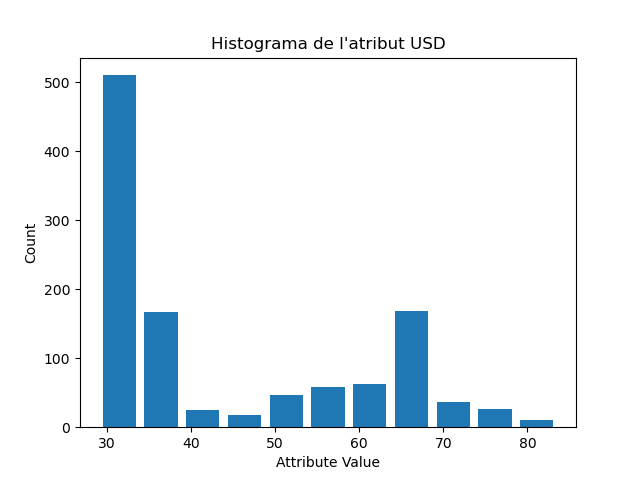

In [13]:
plt.figure()
plt.title("Histograma de l'atribut USD")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(y, bins=11, range=[np.min(y), np.max(y)], histtype="bar", rwidth=0.8)

Ara mirarem la correlació de totes les dades, per veure quina podem escollir per fer una regressió.

<IPython.core.display.Javascript object>


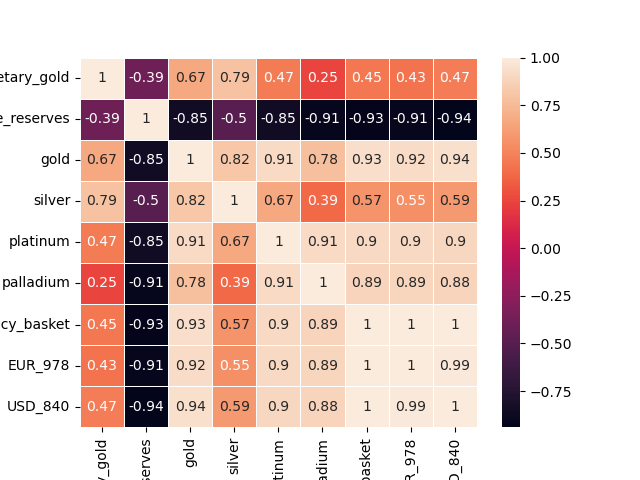

In [14]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [ ]:
Per veure el gràfic més clarament el pairplot ens ajudarà.

<IPython.core.display.Javascript object>


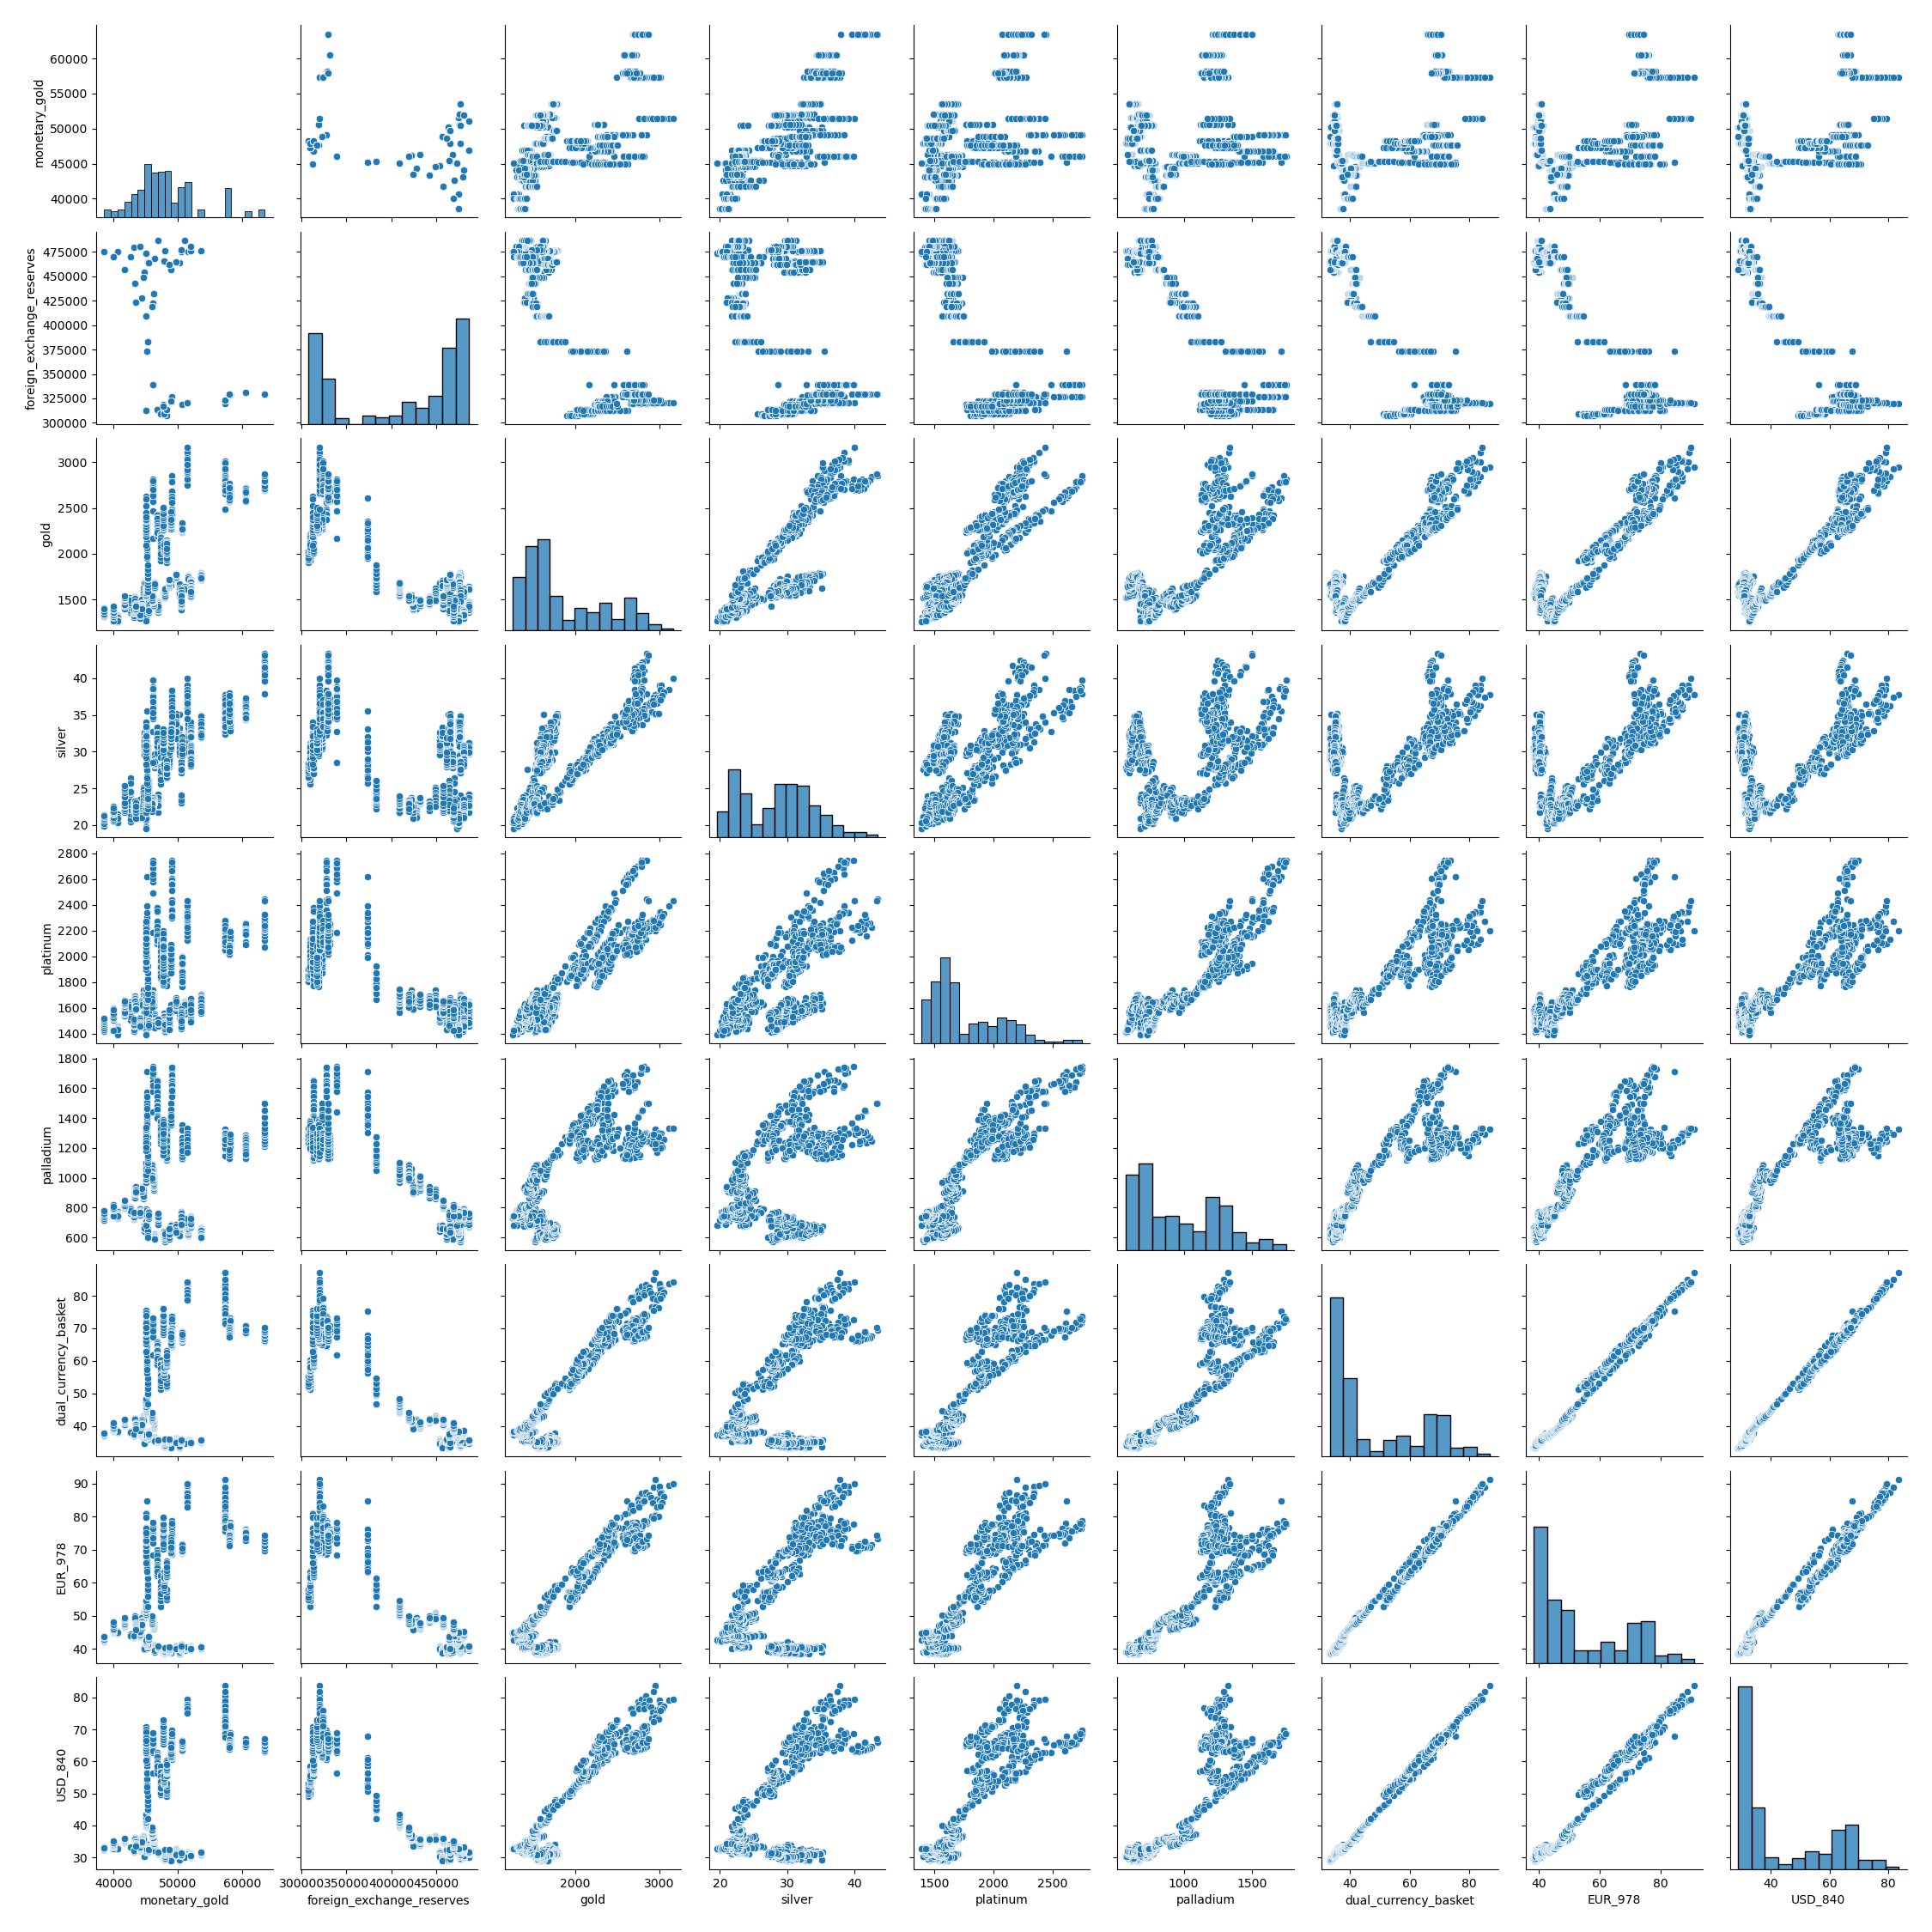

In [15]:
relacio = sns.pairplot(dataset)

# Apartat (B): Primeres regressions
